# Basic Statistics in Python from Scratch

Will again collect relevant functions into modules

In [1]:
from collections import Counter
from typing import List
import matplotlib.pyplot as plt
import random, math
from linalg import Vector, sum_of_squares, subtract, dot
import numpy as np

In [2]:
# seed random
random.seed(42)

In [3]:
# lets say we have 1000 user who each have k friends 
# where k is normally distributed mean=50, stddev=25, min=1, max=100
def sample_friend_count() -> int:
    sample = int(math.ceil(random.gauss(50, 15)))
    return max(1, min(100, sample))
num_friends = [sample_friend_count() for i in range(1000)]


In [4]:
# now lets add synthetic co-variant data for daily minutes on site. We'll say # minutes is correlated by num friends
def sample_daily_minutes(friend_count: int) -> int:
    noise = int(math.ceil(random.gauss(30, 12)))
    noise_corrected = max(1, min(120, noise))
    # cap at 140 for friend count
    return int((140 * (friend_count / 100.)) + noise)
daily_minutes = [sample_daily_minutes(num_friends[i]) for i in num_friends]
    

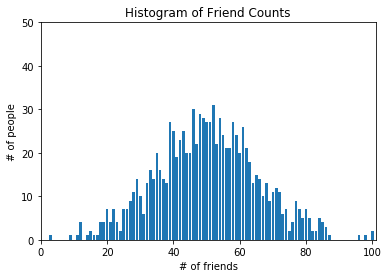

In [5]:
friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[i] for i in xs]
plt.bar(xs, ys)
plt.axis([0, 101, 0, 50])
plt.title('Histogram of Friend Counts')
plt.xlabel('# of friends')
plt.ylabel('# of people')
plt.show()


In [6]:
# report max, min, count of values
print('Max:', max(num_friends), 'Min:', min(num_friends), 'Count:', len(num_friends))

Max: 100 Min: 3 Count: 1000


Max: 100 Min: 3 Count: 1000 Median: 50


In [8]:
def mean(xs: Vector) -> float:
    "returns mean value of vector"
    return sum(xs) / len(xs)
assert abs(mean(sorted_values) - 50) < 3 # our data should be normally distributed around 50, give or take a little bit

In [9]:
def median(xs: Vector) -> float:
    "returns the median value of the vector"
    # edit: x // y provides simpler floor-division than math.floor(x / y)
    assert xs and len(xs) > 0, 'cannot get median of a null or empty vector'
    xs_sorted = sorted(xs)
    mid_index = len(xs_sorted) // 2
    # if len(xs_sorted) is odd: mid index contains true median (e.g. 5 element list has median at index 2)
    # if len(xs_sorted) is even: mid index is the right-half of the median values to average
    # (e.g. a 6 element list has mid index 3, but median is defined by indices 2 & 3)
    if len(xs_sorted) % 2 == 1:
        return xs_sorted[mid_index] 
    else:
        return (xs_sorted[mid_index] + xs_sorted[mid_index - 1]) / 2
assert abs(median(sorted_values) - 50) < 3 # our data should be normally distributed around 50, give or take a little bit
assert median([1,2,3,4,5,6,70000]) == 4.
assert median([-1,3,4,5,6,70000]) == 4.5

An interesting article on [QuickSelect is found here](https://en.wikipedia.org/wiki/Quickselect), which is an algorithm for finding the kth smallest element in an un-ordered list. This finds the median
as part of a sort algorithm with O(n) average case, O(n^2) worst case performance, but can short circuit prior to finding the element (in short, you only need to sort part of the list to find the median) 


In [10]:
# quantile generalization of median
def quantile(xs: Vector, p: float) -> float:
    """Returns the value for the pth-percentile of the data (e.g. median for p=.5)"""
    assert xs and len(xs) > 0, 'cannot get median of a null or empty vector'
    xs_sorted = sorted(xs)
    p_index = int(len(xs_sorted) * p)
    return xs_sorted[p_index]
assert quantile([1,2,3,4,5,6,70000], .5) == 4.
assert quantile([-1,3,4,5,6,70000], .5) == 5. # note the difference here, is this correct?
assert quantile([-1,3,4,5,6,70000], .99) == 70000

In [11]:
def mode(xs: Vector) -> List[float]:
    """finds the mode of the vector, returning a list in case there is more than one mode"""
    counter = Counter(xs)
    max_count = max(counter.values())
    return [val for val, count in counter.items() if count == max_count]
assert set(mode([1,1,1, 3, 3, 3, 2, 2, 4, 4, 5, 5, 5, 6])) == {1, 3, 5}


In [12]:
def data_range(xs: Vector) -> float:
    """returns the range of a vector"""
    assert xs, 'need a vector!'
    return max(xs) - min(xs)

In [13]:
def variance(xs: Vector) -> float:
    """returns the variance of a vector"""
    assert xs and len(xs) >= 2, 'variance requires at least two elements'
    sample_mean = mean(xs)
    v_diff = [x - sample_mean for x in xs]
    return sum_of_squares(v_diff) / (len(v_diff) - 1)

# verify we agree with numpy
data = list(np.random.rand(100))
assert abs(variance(data) - np.var(data, ddof=1)) < 10**-9
# interesting note about ddof here: 
# https://stackoverflow.com/questions/41204400/what-is-the-difference-between-numpy-var-and-statistics-variance-in-python


More interesting info here, but essentially it is impossible to get an un-biased estimate of the standard deviation from only a sample, and the `-1` and `ddof` in the variance equation are known as Bessel's correction, which reduces bias in variance estimation and some of the bias in std_dev estmation

See article [here](https://en.wikipedia.org/wiki/Unbiased_estimation_of_standard_deviation)

In [14]:
def standard_deviation(xs: Vector) -> float:
    """returns the standard deviation of a vector, which is sqrt variance
    
    Units: if xs is in meters, returns std dev in meters
    """
    assert xs and len(xs) >= 2, 'std dev requires at least two elements'
    return math.sqrt(variance(xs))
# verify we agree with numpy
data = list(np.random.rand(100))
assert abs(standard_deviation(data) - np.std(data, ddof=1)) < 10**-9

In [15]:
def interquantile_range(xs: Vector) -> float:
    """returns the difference between the 75th and 25th percent quantile"""
    return quantile(xs, .75) - quantile(xs, .25)

In [16]:
def covariance(xs: Vector, ys: Vector) -> float:
    """return the covariance of two vectors"""
    assert xs and ys and len(xs) == len(ys), 'vectors must exist and have equal length'
    x_mean, y_mean = mean(xs), mean(ys)
    x_bar, y_bar = [x - x_mean for x in xs], [y - y_mean for y in ys]
    # now we have two vectors of the form x_i - x_mean, the total covariance 
    # is a dot product sum((x_i - x_mean)*(y_i - y_mean)) / length (length alone shouldn't dictate covariance)
    return dot(x_bar, y_bar) / (len(xs) - 1) # Note the Bessel correction
data_xs = list(np.random.rand(100))
data_ys = list(np.random.rand(100))

# np.cov returns full covariance matrix (0, 0) is variance in xs, (1, 1) is variance in ys, 
# (0, 1) and (1, 0) are covariance xs, ys
assert abs(np.cov(data_xs, y=data_ys, ddof=1)[0][1] - covariance(data_xs, data_ys)) < 10**-9

### Covariance

![covariance eq](https://wikimedia.org/api/rest_v1/media/math/render/svg/7120384a1c843727d9589e2b33dbc33901d14f42)
From above, one describe the covariance of two real-valued variables to be the Expected value of the product of the difference from expected value of each variable. In (many/most/all?) cases of observed data `E[x]` is the sample mean.

#### Interpretting Covariance

Since this is the summed-product of differences from a mean, values in the sum are positive when the diff from the mean share signs, negative otherwise. Thus positive covariance suggests positive correlation*, negative covariance suggests negative correlation*.

##### Units of Covariance
Covariance units are hard to interpret: Looking at example
`xs`: the number of friends of each user (friends)
`ys`: the number of minutes spent online for each user (minutes)
`covariance`: friend-minutes (a nonsensical value)

An interesting note: if each user had 2x as many friends, covariance would be twice as large (sum now has (2x - 2x_hat)(y - y_hat) where it used to have (x - x_hat)(y - y_hat). However, a transform like this isn't really impacting the nature of the correlation*, so magnitude of covariance also lacks clear meaning.


\* so apparently `correlation` has an actual statistical meaning: it is the covariance with the std dev of each variable divided from the sum

In [17]:
# this is the correlation coefficient, which can be sensitive to outliers
def correlation(xs: Vector, ys: Vector) -> float:
        """return the correlation of two vectors"""
        cov = covariance(xs, ys)
        std_x = standard_deviation(xs)
        std_y = standard_deviation(ys)
        # if there is no variance in either xs or ys, there is no correlation
        return cov / (std_x * std_y) if std_x > 0 and std_y > 0 else 0

data_xs = list(np.random.rand(100))
# same matrix issue with np.cov
assert abs(np.corrcoef(data_xs, data_ys)[0][1] - correlation(data_xs, data_ys)) < 10**-9

### Simpsons Paradox

Interesting note on this relative to other explanations. My favorite remains this one from [colah's blog](https://colah.github.io/posts/2015-09-Visual-Information/). 

From the book: One not uncommon surprise when analyzing data is *Simpson's Paradox* in which correlations can be misleading when confounding variables are ignored ... the problem is that correlation measures the relationship between your two variabled *all else being equal*. If your data classes are assigned at random, this might not be a terrible assumption in a well designed experiment. When there is a deeper pattern to class assignments, *all else being equal* becomes a very poor assumption.

Confounding variables need to be carefully reasoned about, and might not always be in the data directly. In the famous UC case, they were able to show the imbalanced class assignment into competitive programs across gender because they had the applicant data. If your dataset lacks this class defining parameter, you're s.o.l without enough knowledge of the domain to consider the potential confounders. 

### Correlation Caveats

##### Correlation captures only linear relationships between x_i, y_i pairs
An interesting example of two functions with zero correlation:

`xs: x for x in (-inf, inf)`
`ys: abs(x) for x in (-inf, inf)`

These have zero correlation but are clearly deeply related. Correlation only looks for one kind of relationship (in this case also linear): what information about `y_i` does knowing `x_i - mean(xs)` provide? Other relationships might not be captured or can be misrepresented.

##### Correlation does not indicate the size of the relationship

E.g.
`xs: [0, 1, 2, 3, 4, 5]` = running days per week
`ys: [600, 599, 598, 597, 596]` = seconds in a mile time

In [18]:
xs = [0, 1, 2, 3, 4, 5]
ys = [600, 599, 598, 597, 596, 595]
correlation(xs, ys)

-1.0

As one can see above: perfectly negative correlation. The pattern isn't that interesting though, considering the data: running between 0-5 times per week on average should have more than a 1 second impact per daily average on a mile time (10:00 -> 9:55)